In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
enc = OrdinalEncoder()
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn import metrics


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR, SVC


import warnings 
warnings.filterwarnings('ignore')

In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
conda install -c conda-forge imbalanced-learn


- Have run this code to import SMOTE since below code was not working
- import six
import joblib
import sys
sys.modules['sklearn.external.six'] = six
sys.modules['sklearn.external.joblib'] = joblib

In [3]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

In [4]:
df = pd.read_csv(r"D:\Datasets\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Attrition, BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, Over18 and OverTime are Object type data which needs to change to Int

In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no Null Values present in the database hence we can move a head

In [7]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

Endcoded object data into Int

In [8]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


StandardHours, EmployeeCount and Over 18 has no other data than 80 hence this data does not contributes to the Label

In [9]:
x = df.drop(['Attrition'],axis=1)
y = df['Attrition']

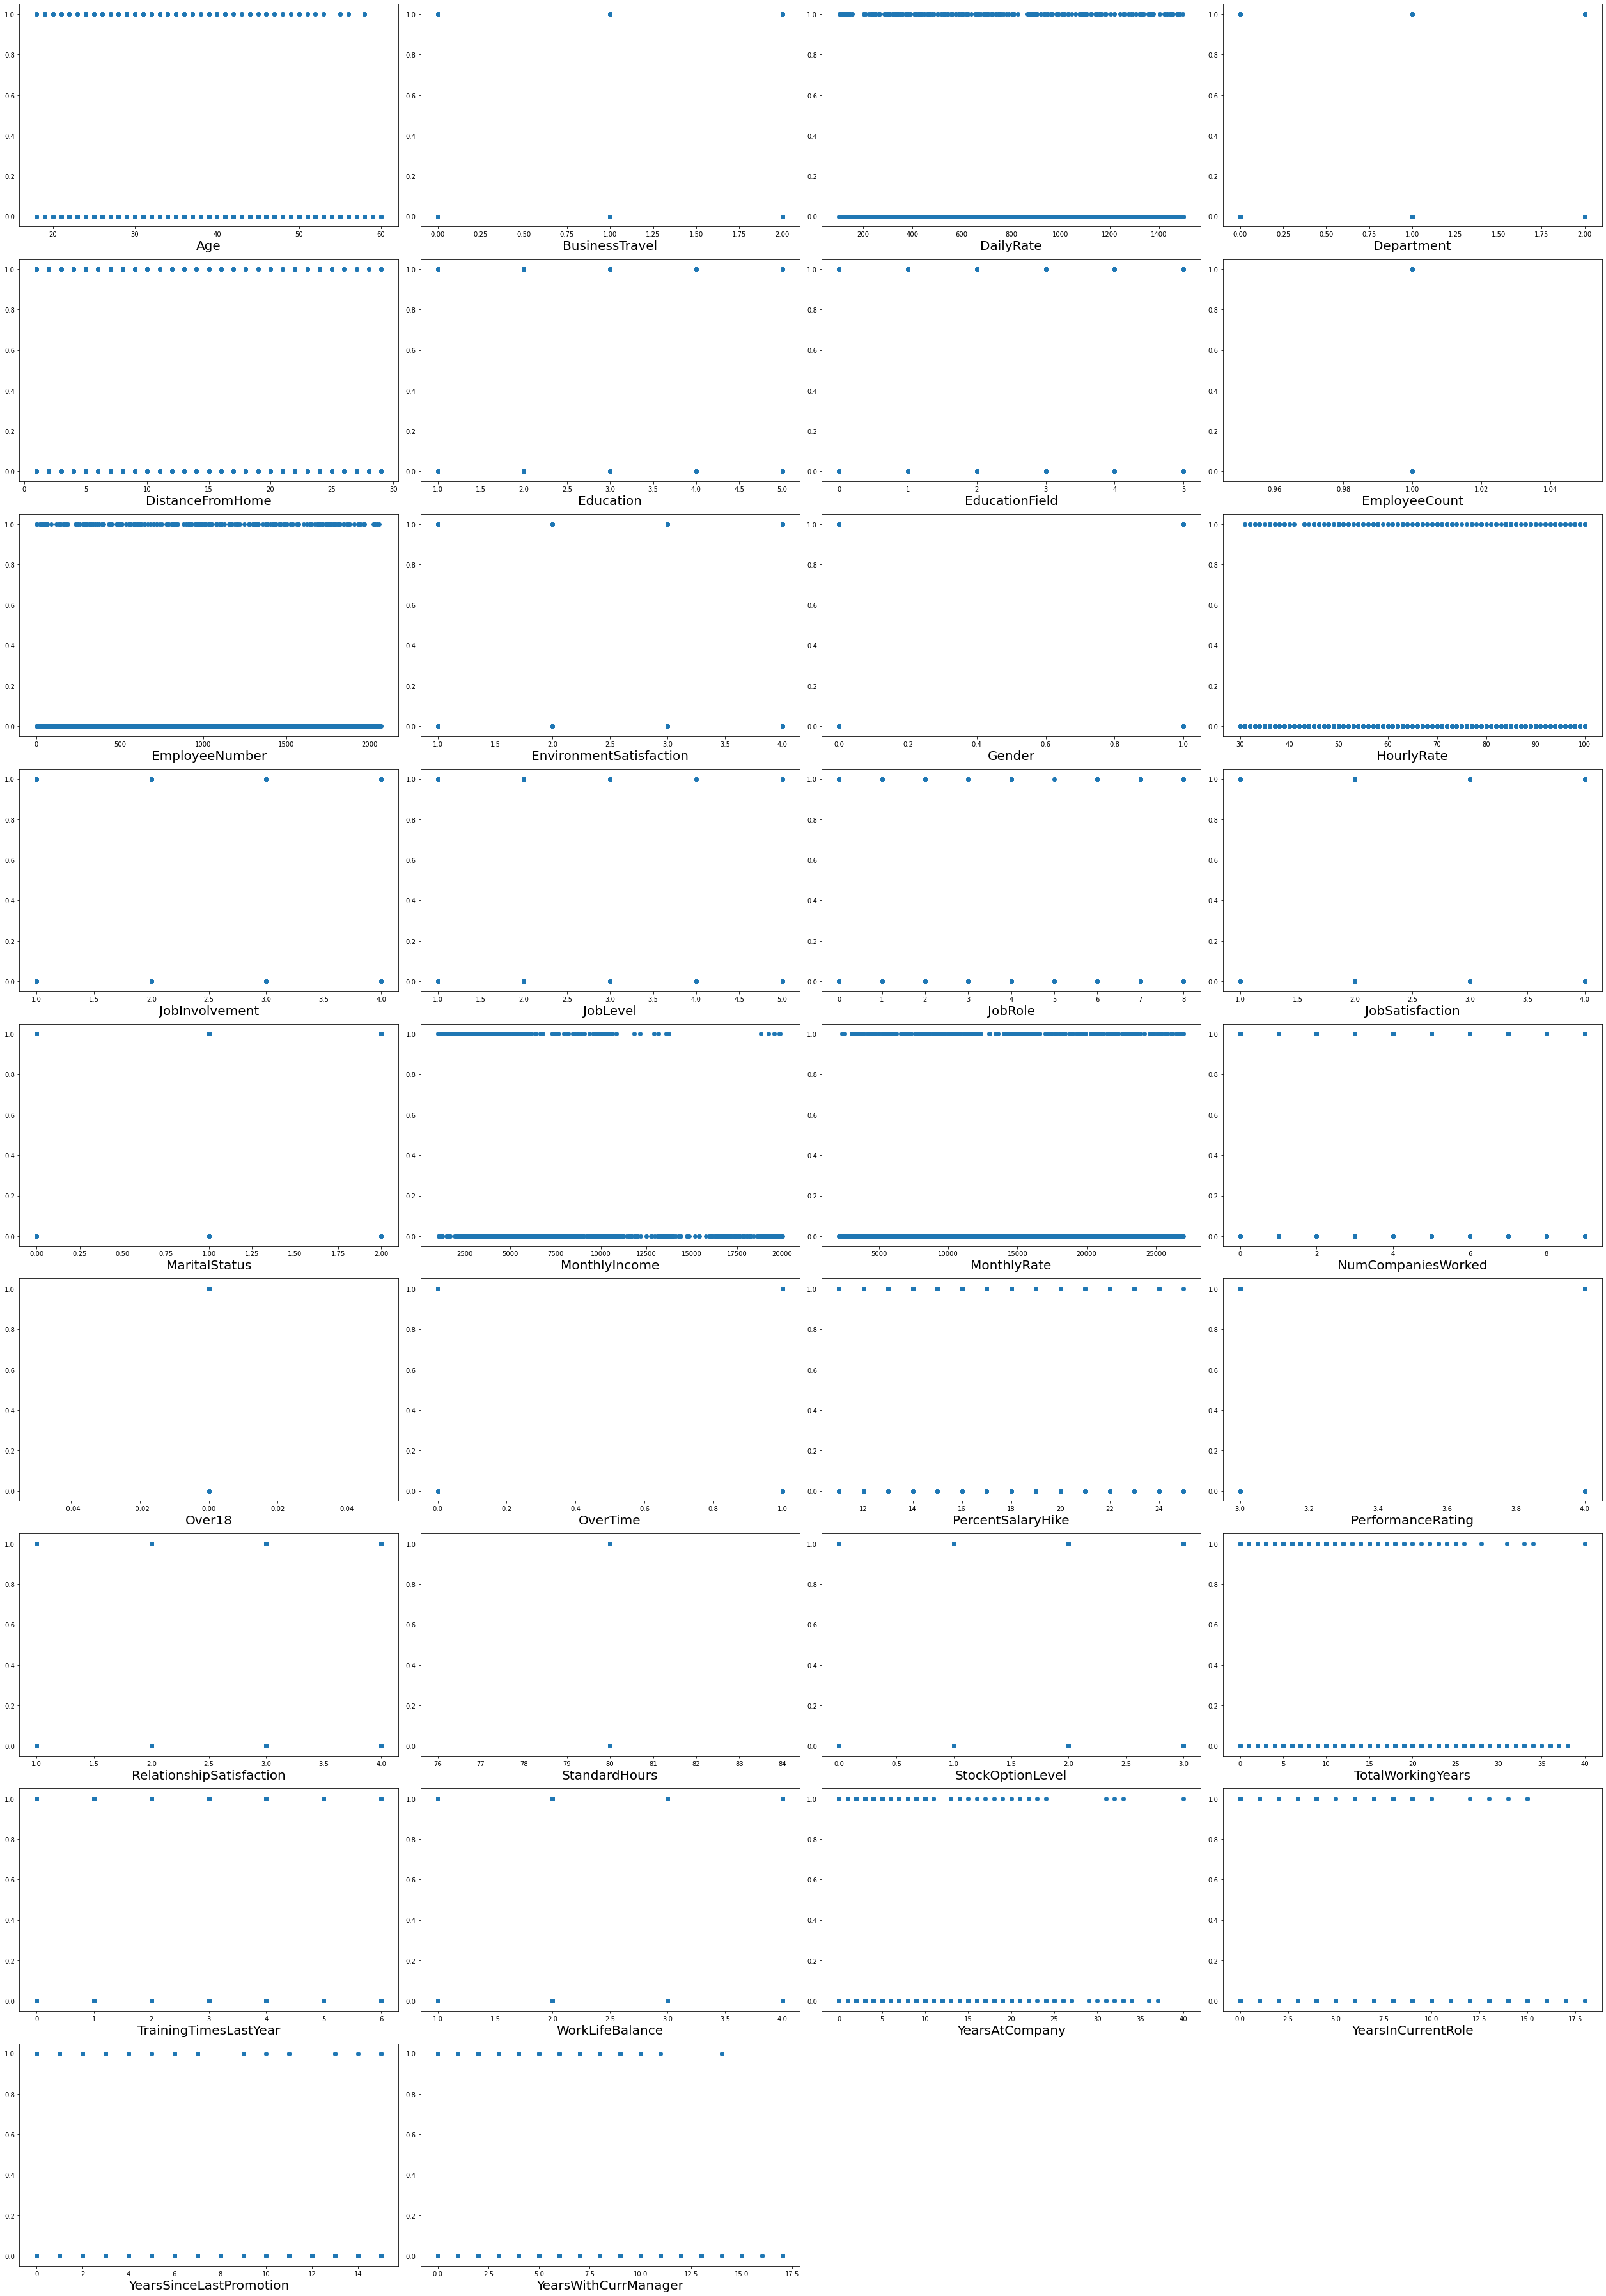

In [10]:
plt.figure(figsize=(35,50), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 36:
        ax = plt.subplot(9,4,plotno)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()



Monthly Income plays very important role in attribution

In [11]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
S

BusinessTravel, DistanceFromHome, JobLevel, MonthlyIncome, NumCompaniesWorked, OverTime, PercentSalaryHike, PerformanceRating, StockOptionLevel, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion and YearsWithCurrManager has skewness

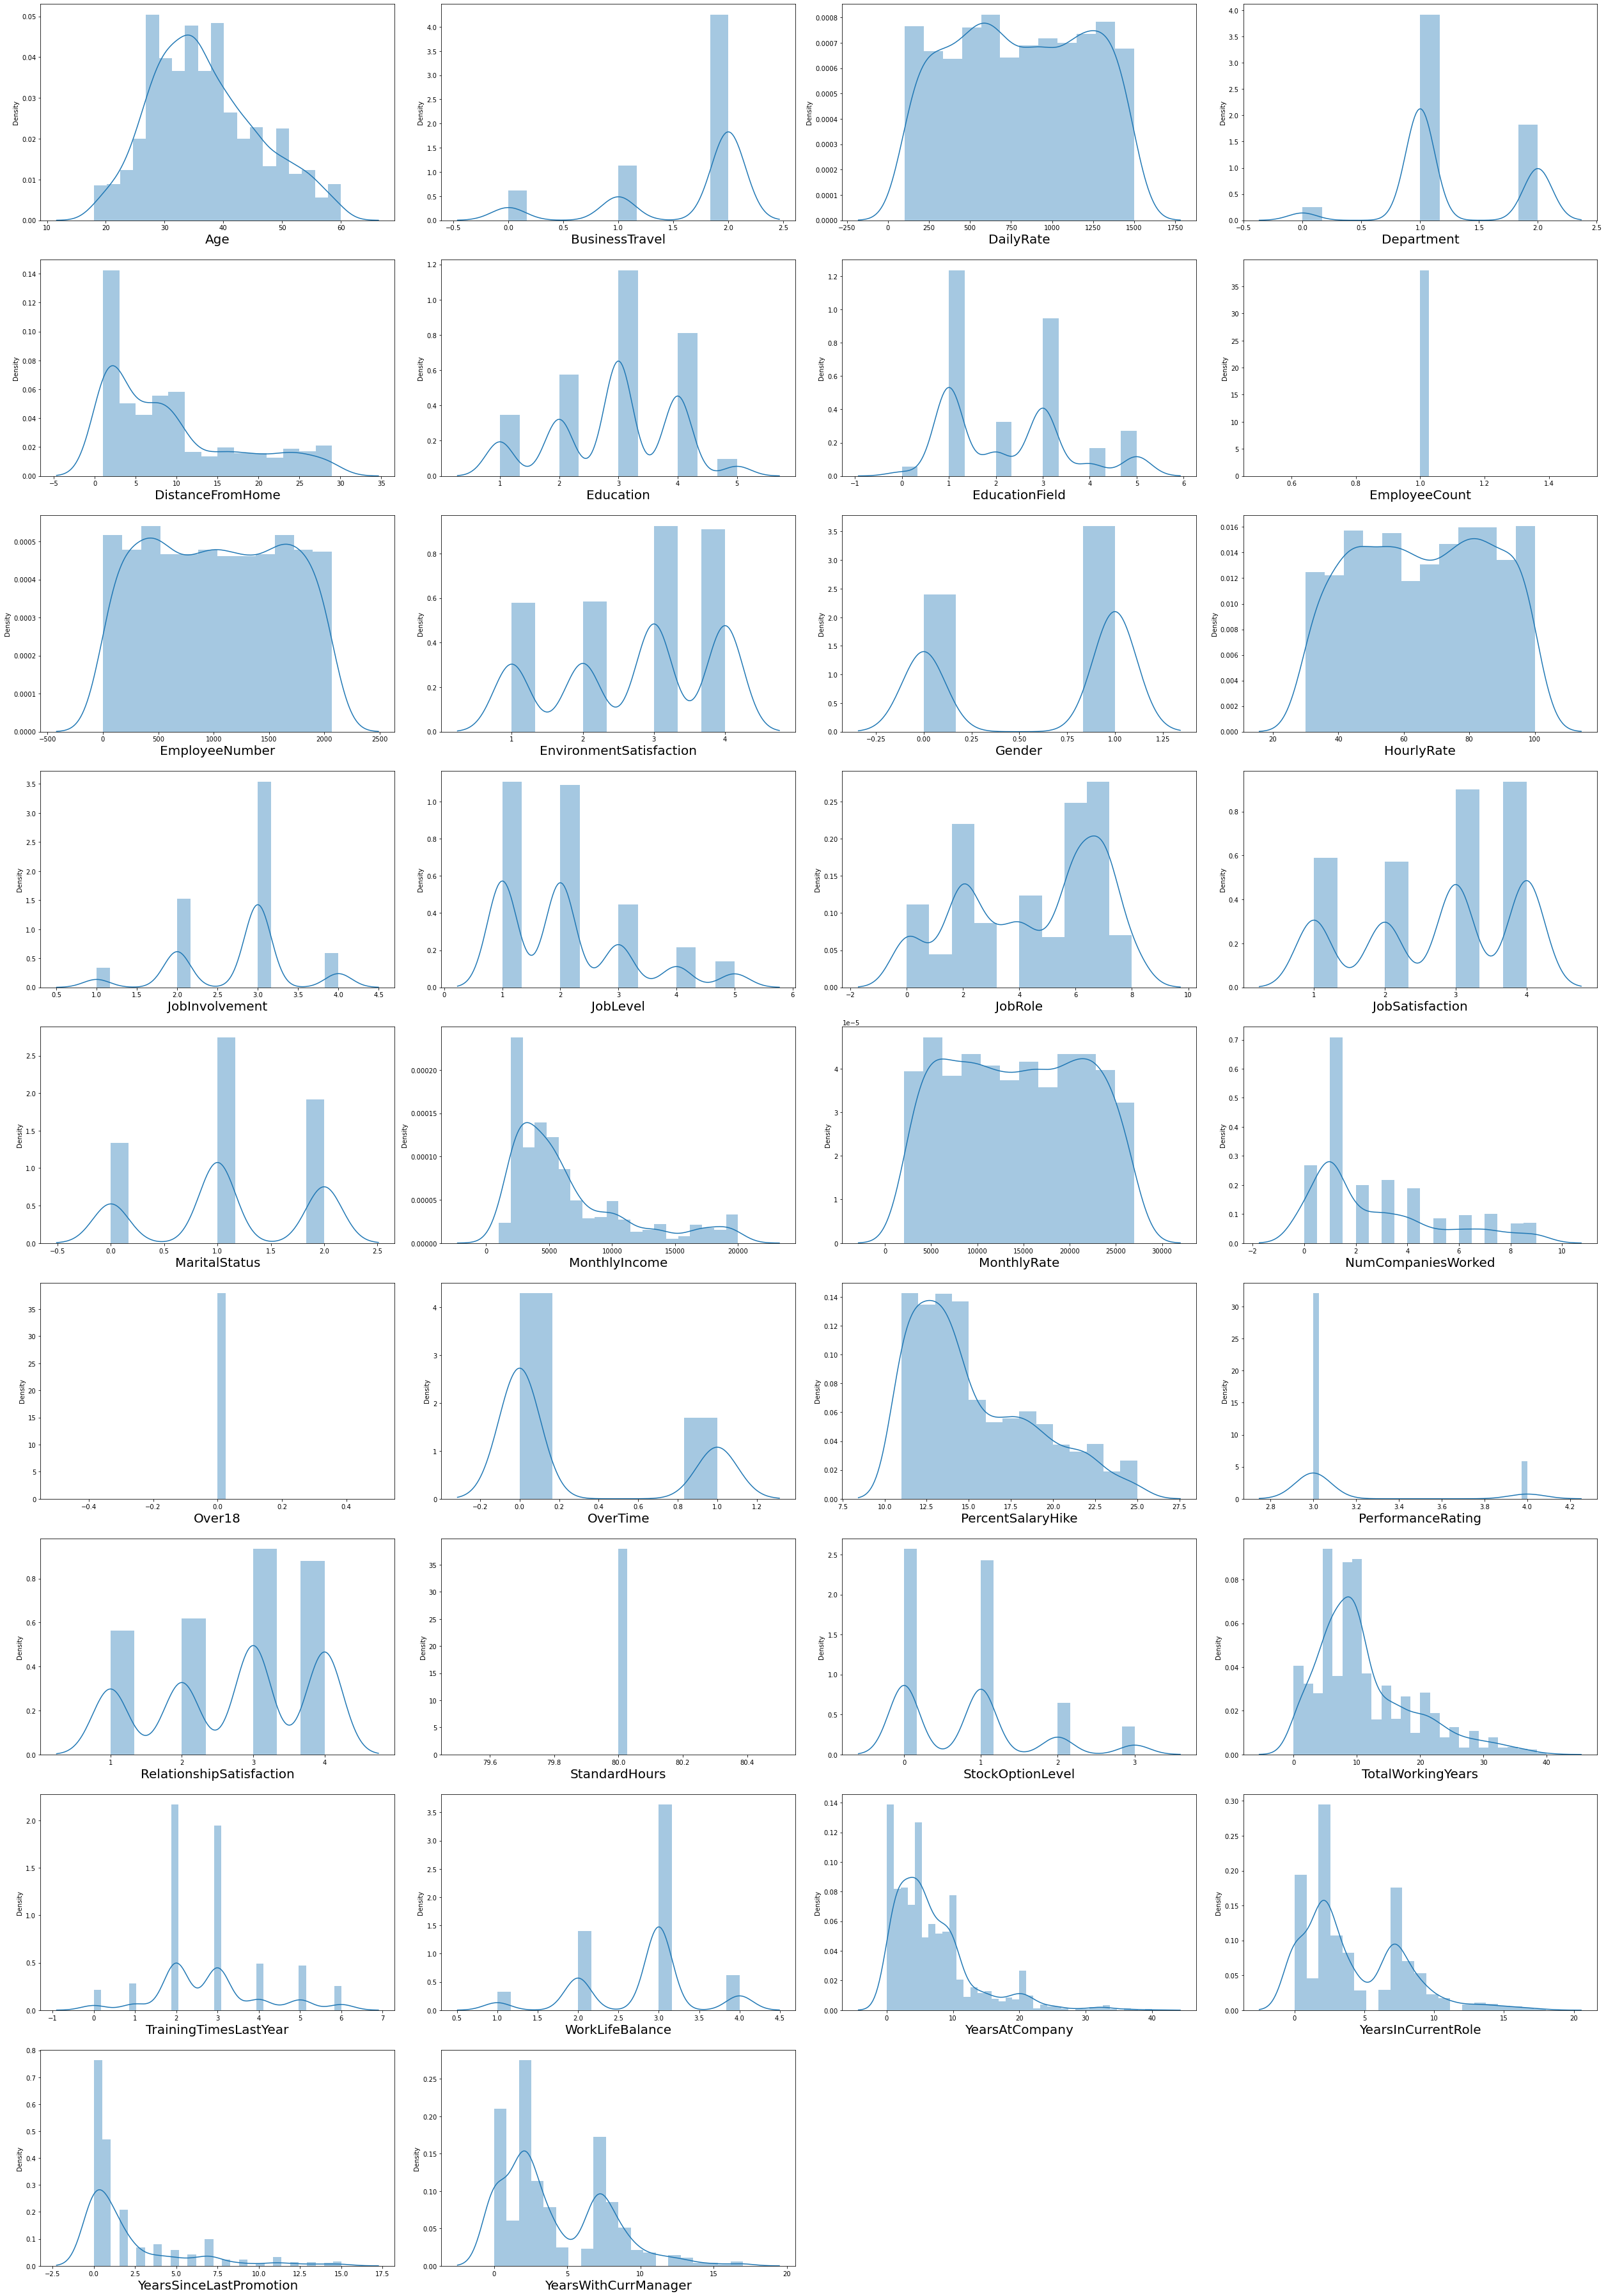

In [12]:
plt.figure(figsize=(35,50), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 36:
        ax = plt.subplot(9,4,plotno)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

DistanceFromHome, MonthlyIncome, NumCompaniesWorked, PercentSalaryHike, TotalWorkingYears, YearsInCurrentRole, YearsSinceLastPromotion and YearsWithCurrManager has skewness

In [13]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [14]:
df.drop('Attrition',axis=1).corrwith(df.Attrition)

Age                        -0.159205
BusinessTravel              0.000074
DailyRate                  -0.056652
Department                  0.063991
DistanceFromHome            0.077924
Education                  -0.031373
EducationField              0.026846
EmployeeCount                    NaN
EmployeeNumber             -0.010577
EnvironmentSatisfaction    -0.103369
Gender                      0.029453
HourlyRate                 -0.006846
JobInvolvement             -0.130016
JobLevel                   -0.169105
JobRole                     0.067151
JobSatisfaction            -0.103481
MaritalStatus               0.162070
MonthlyIncome              -0.159840
MonthlyRate                 0.015170
NumCompaniesWorked          0.043494
Over18                           NaN
OverTime                    0.246118
PercentSalaryHike          -0.013478
PerformanceRating           0.002889
RelationshipSatisfaction   -0.045872
StandardHours                    NaN
StockOptionLevel           -0.137145
T

BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeNumber, Gender, HourlyRate, JobRole, MonthlyRate, NumCompaniesWorked, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, TrainingTimesLastYear, WorkLifeBalance and YearsSinceLastPromotion have less corelation with label

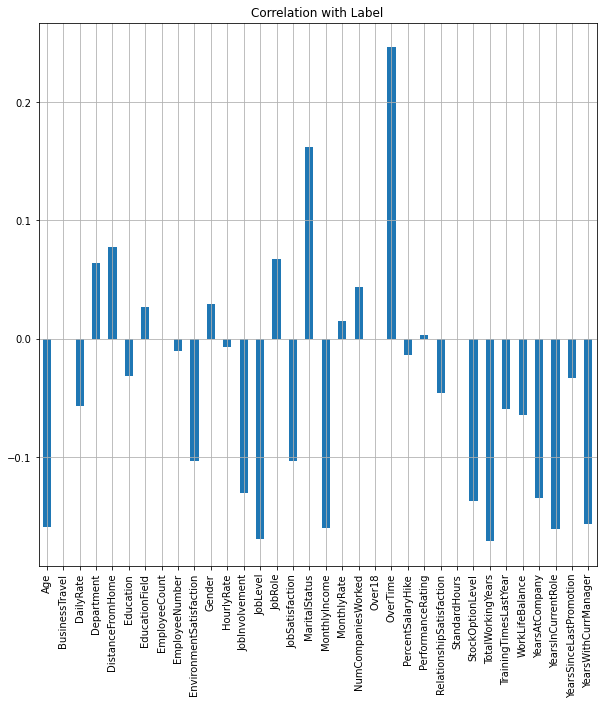

In [15]:
df.drop('Attrition',axis=1).corrwith(df.Attrition).plot(kind='bar',grid=True,figsize=(10,10),
                                                     title="Correlation with Label")
plt.show()

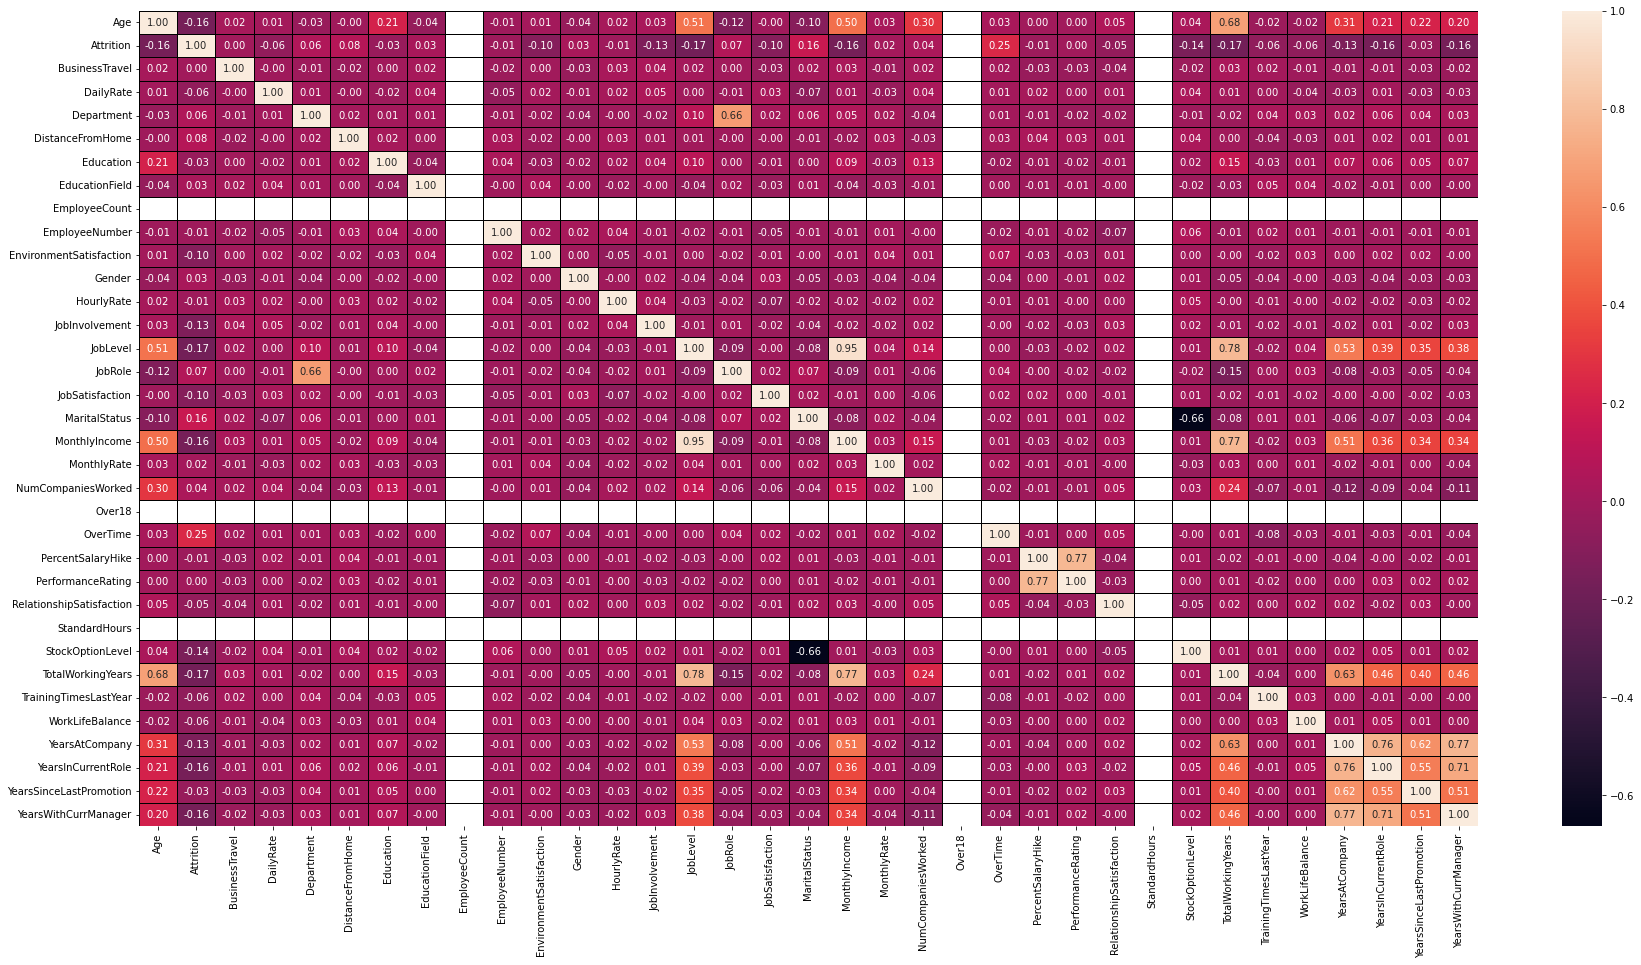

In [16]:
plt.figure(figsize = (30,15))
sns.heatmap(df.corr(),annot=True, linewidths=0.5,linecolor='black',fmt = '.2f')
plt.show()

In [17]:
df = df.drop(['StandardHours', 'EmployeeCount', 'Over18'],axis=1)

Deleting 'StandardHours', 'EmployeeCount' and 'Over18' since it has no relation with label

Multicollinearity problem exist in this database

- Multicollinearity problem exist between JobLevel and MonthlyRate


In [18]:
x = df[['JobLevel','MonthlyIncome']]
y = df['Attrition']

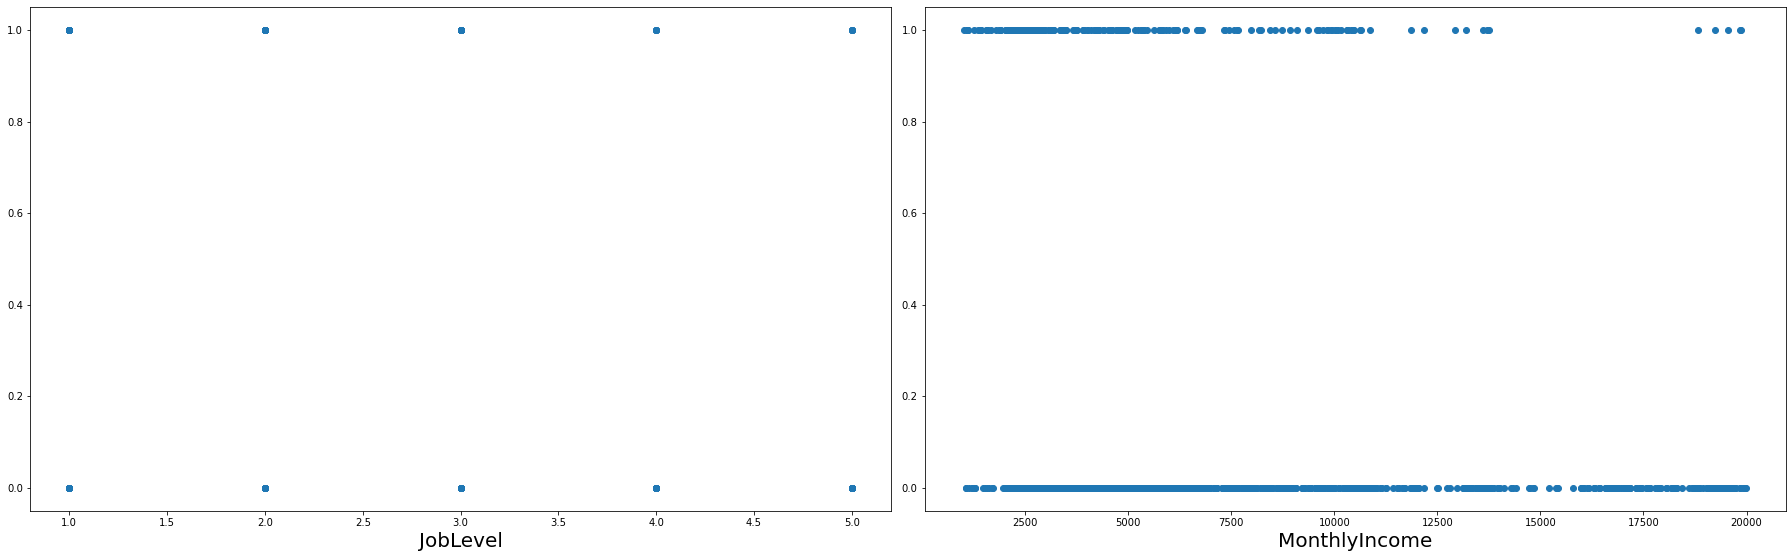

In [19]:
plt.figure(figsize=(25,15), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 4:
        ax = plt.subplot(2,2,plotno)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

- MonthlyIncome column have less collinearity with Attrition

In [20]:
x = df['JobLevel']
y = df['MonthlyIncome']

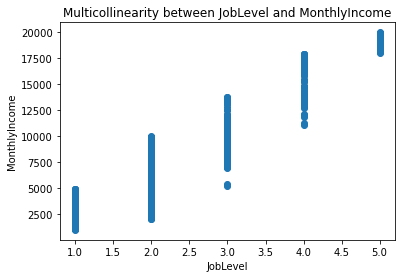

In [21]:
plt.scatter(x,y)
plt.xlabel('JobLevel')
plt.ylabel('MonthlyIncome')
plt.title('Multicollinearity between JobLevel and MonthlyIncome')
plt.show()

- The Multicollinearity problem exist between 'JobLevel' and 'MonthlyIncome'

In [22]:
vif = pd.DataFrame()
vif["Features"] = df.columns

In [23]:
vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]

In [24]:
vif.sort_values(by=['VIF'])

,Features,VIF
1,Attrition,1.487239
20,OverTime,1.552753
5,DistanceFromHome,2.340882
30,YearsSinceLastPromotion,2.467467
10,Gender,2.523201
19,NumCompaniesWorked,2.762730
24,StockOptionLevel,3.353074
7,EducationField,3.872875
8,EmployeeNumber,3.927949
3,DailyRate,4.980538


- JobLevel has greater VIF hence have removed JobLevel to solve multicollinearity issue
- PercentSalaryHike, BusinessTravel, PerformanceRating, WorkLifeBalance, HourlyRate has high VIF and lower co-relation with Label hence have dropped those columns

In [25]:
df = df.drop(['JobLevel','PercentSalaryHike', 'BusinessTravel', 'PerformanceRating', 'WorkLifeBalance', 'HourlyRate'],axis=1)

In [26]:
df.head()

,Age,Attrition,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,NumCompaniesWorked,OverTime,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,1102,2.0,1,2,1.0,1,2,0.0,...,8,1.0,1,0,8,0,6,4,0,5
1,49,0.0,279,1.0,8,1,1.0,2,3,1.0,...,1,0.0,4,1,10,3,10,7,1,7
2,37,1.0,1373,1.0,2,2,4.0,4,4,1.0,...,6,1.0,2,0,7,3,0,0,0,0
3,33,0.0,1392,1.0,3,4,1.0,5,4,0.0,...,1,1.0,3,0,8,3,8,7,3,0
4,27,0.0,591,1.0,2,1,3.0,7,1,1.0,...,9,0.0,4,1,6,3,2,2,2,2


In [27]:
df.describe()

,Age,Attrition,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,NumCompaniesWorked,OverTime,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,1.260544,9.192517,2.912925,2.247619,1024.865306,2.721769,0.600000,...,2.693197,0.282993,2.712245,0.793878,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,0.527792,8.106864,1.024165,1.331369,602.024335,1.093082,0.490065,...,2.498009,0.450606,1.081209,0.852077,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,1.000000,2.000000,2.000000,1.000000,491.250000,2.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1020.500000,3.000000,1.000000,...,2.000000,0.000000,3.000000,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1555.750000,4.000000,1.000000,...,4.000000,1.000000,4.000000,1.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,2068.000000,4.000000,1.000000,...,9.000000,1.000000,4.000000,3.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


Database is ready to remove outliers if exist 

In [28]:
x = df.drop(['Attrition'],axis=1)
y = df['Attrition']

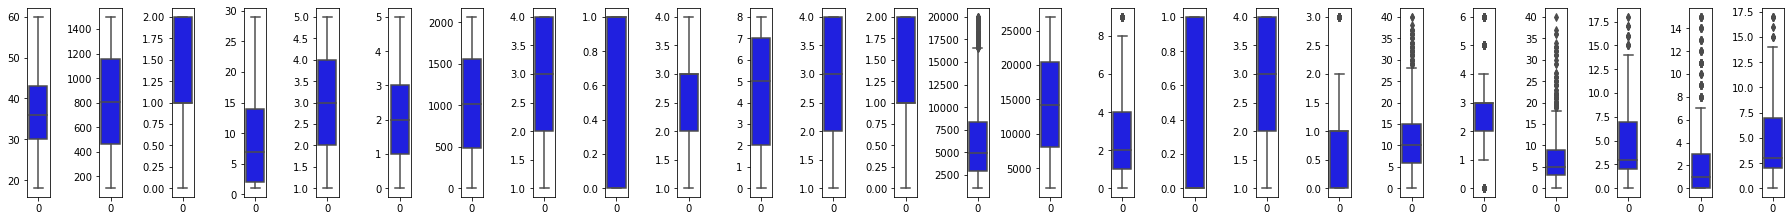

In [29]:
a = x.columns.values
col = 30
row = 14
plt.figure(figsize = (col,3*row))
for i in range(0, len(a)):
    plt.subplot(row,col,i+1)
    sns.boxplot(data = x[a[i]],color='blue',orient='v')
    plt.tight_layout()

Outliers are present in 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'NumCompaniesWorked' and 'MonthlyIncome' columns

In [30]:
old_data = (df.shape)[0]

In [31]:
q1 = df['MonthlyIncome'].quantile(0.25)
q3 = df['MonthlyIncome'].quantile(0.75)
iqr = q3 - q1

upper = np.where(df['MonthlyIncome'] > (q3+1.5*iqr))
lower = np.where(df['MonthlyIncome'] < (q1-1.5*iqr))

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed Outliers from MonthlyIncome column

In [32]:
q1 = df['TotalWorkingYears'].quantile(0.25)
q3 = df['TotalWorkingYears'].quantile(0.75)
iqr = q3 - q1

upper = np.where(df['TotalWorkingYears'] > (q3+1.5*iqr))
lower = np.where(df['TotalWorkingYears'] < (q1-1.5*iqr))

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed Outliers from TotalWorkingYears column

In [33]:
q1 = df['TrainingTimesLastYear'].quantile(0.25)
q3 = df['TrainingTimesLastYear'].quantile(0.75)
iqr = q3 - q1

upper = np.where(df['TrainingTimesLastYear'] > (q3+1.5*iqr))
lower = np.where(df['TrainingTimesLastYear'] < (q1-1.5*iqr))

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed Outliers from TrainingTimesLastYear column

In [34]:
q1 = df['YearsAtCompany'].quantile(0.25)
q3 = df['YearsAtCompany'].quantile(0.75)
iqr = q3 - q1

upper = np.where(df['YearsAtCompany'] > (q3+1.5*iqr))
lower = np.where(df['YearsAtCompany'] < (q1-1.5*iqr))

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed Outliers from YearsAtCompany column

In [35]:
q1 = df['YearsInCurrentRole'].quantile(0.25)
q3 = df['YearsInCurrentRole'].quantile(0.75)
iqr = q3 - q1

upper = np.where(df['YearsInCurrentRole'] > (q3+1.5*iqr))
lower = np.where(df['YearsInCurrentRole'] < (q1-1.5*iqr))

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed Outliers from YearsInCurrentRole column

In [36]:
q1 = df['YearsSinceLastPromotion'].quantile(0.25)
q3 = df['YearsSinceLastPromotion'].quantile(0.75)
iqr = q3 - q1

upper = np.where(df['YearsSinceLastPromotion'] > (q3+1.5*iqr))
lower = np.where(df['YearsSinceLastPromotion'] < (q1-1.5*iqr))

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed Outliers from YearsSinceLastPromotion column

In [37]:
q1 = df['YearsWithCurrManager'].quantile(0.25)
q3 = df['YearsWithCurrManager'].quantile(0.75)
iqr = q3 - q1

upper = np.where(df['YearsWithCurrManager'] > (q3+1.5*iqr))
lower = np.where(df['YearsWithCurrManager'] < (q1-1.5*iqr))

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed Outliers from YearsWithCurrManager column 

In [38]:
q1 = df['NumCompaniesWorked'].quantile(0.25)
q3 = df['NumCompaniesWorked'].quantile(0.75)
iqr = q3 - q1

upper = np.where(df['NumCompaniesWorked'] > (q3+1.5*iqr))
lower = np.where(df['NumCompaniesWorked'] < (q1-1.5*iqr))

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed Outliers from NumCompaniesWorked column 

In [39]:
new_data = (df.shape)[0]

In [40]:
data_loss = old_data - new_data
print('Lost', data_loss,'no. of Data')

Lost 581 no. of Data


In [41]:
x = df.drop(['Attrition'],axis=1)
y = df['Attrition']

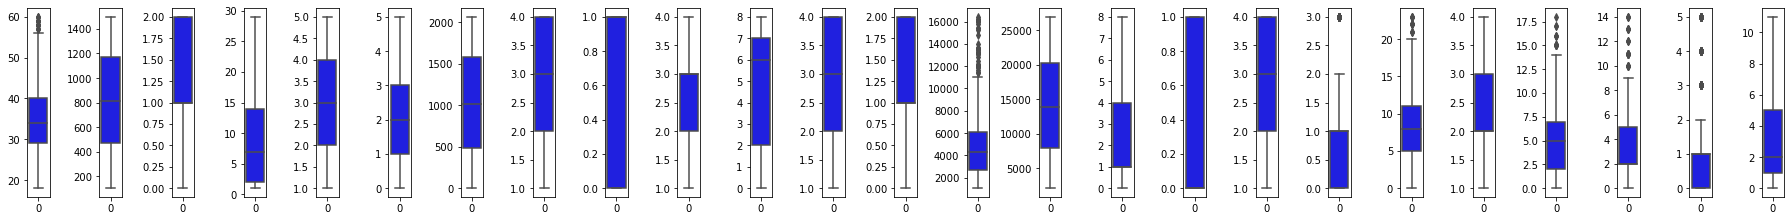

In [42]:
a = x.columns.values
col = 30
row = 14
plt.figure(figsize = (col,3*row))
for i in range(0, len(a)):
    plt.subplot(row,col,i+1)
    sns.boxplot(data = x[a[i]],color='blue',orient='v')
    plt.tight_layout()

In [43]:
x.columns

Index(['Age', 'DailyRate', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

Removed Outliers that are not allowed above and below the specified limit

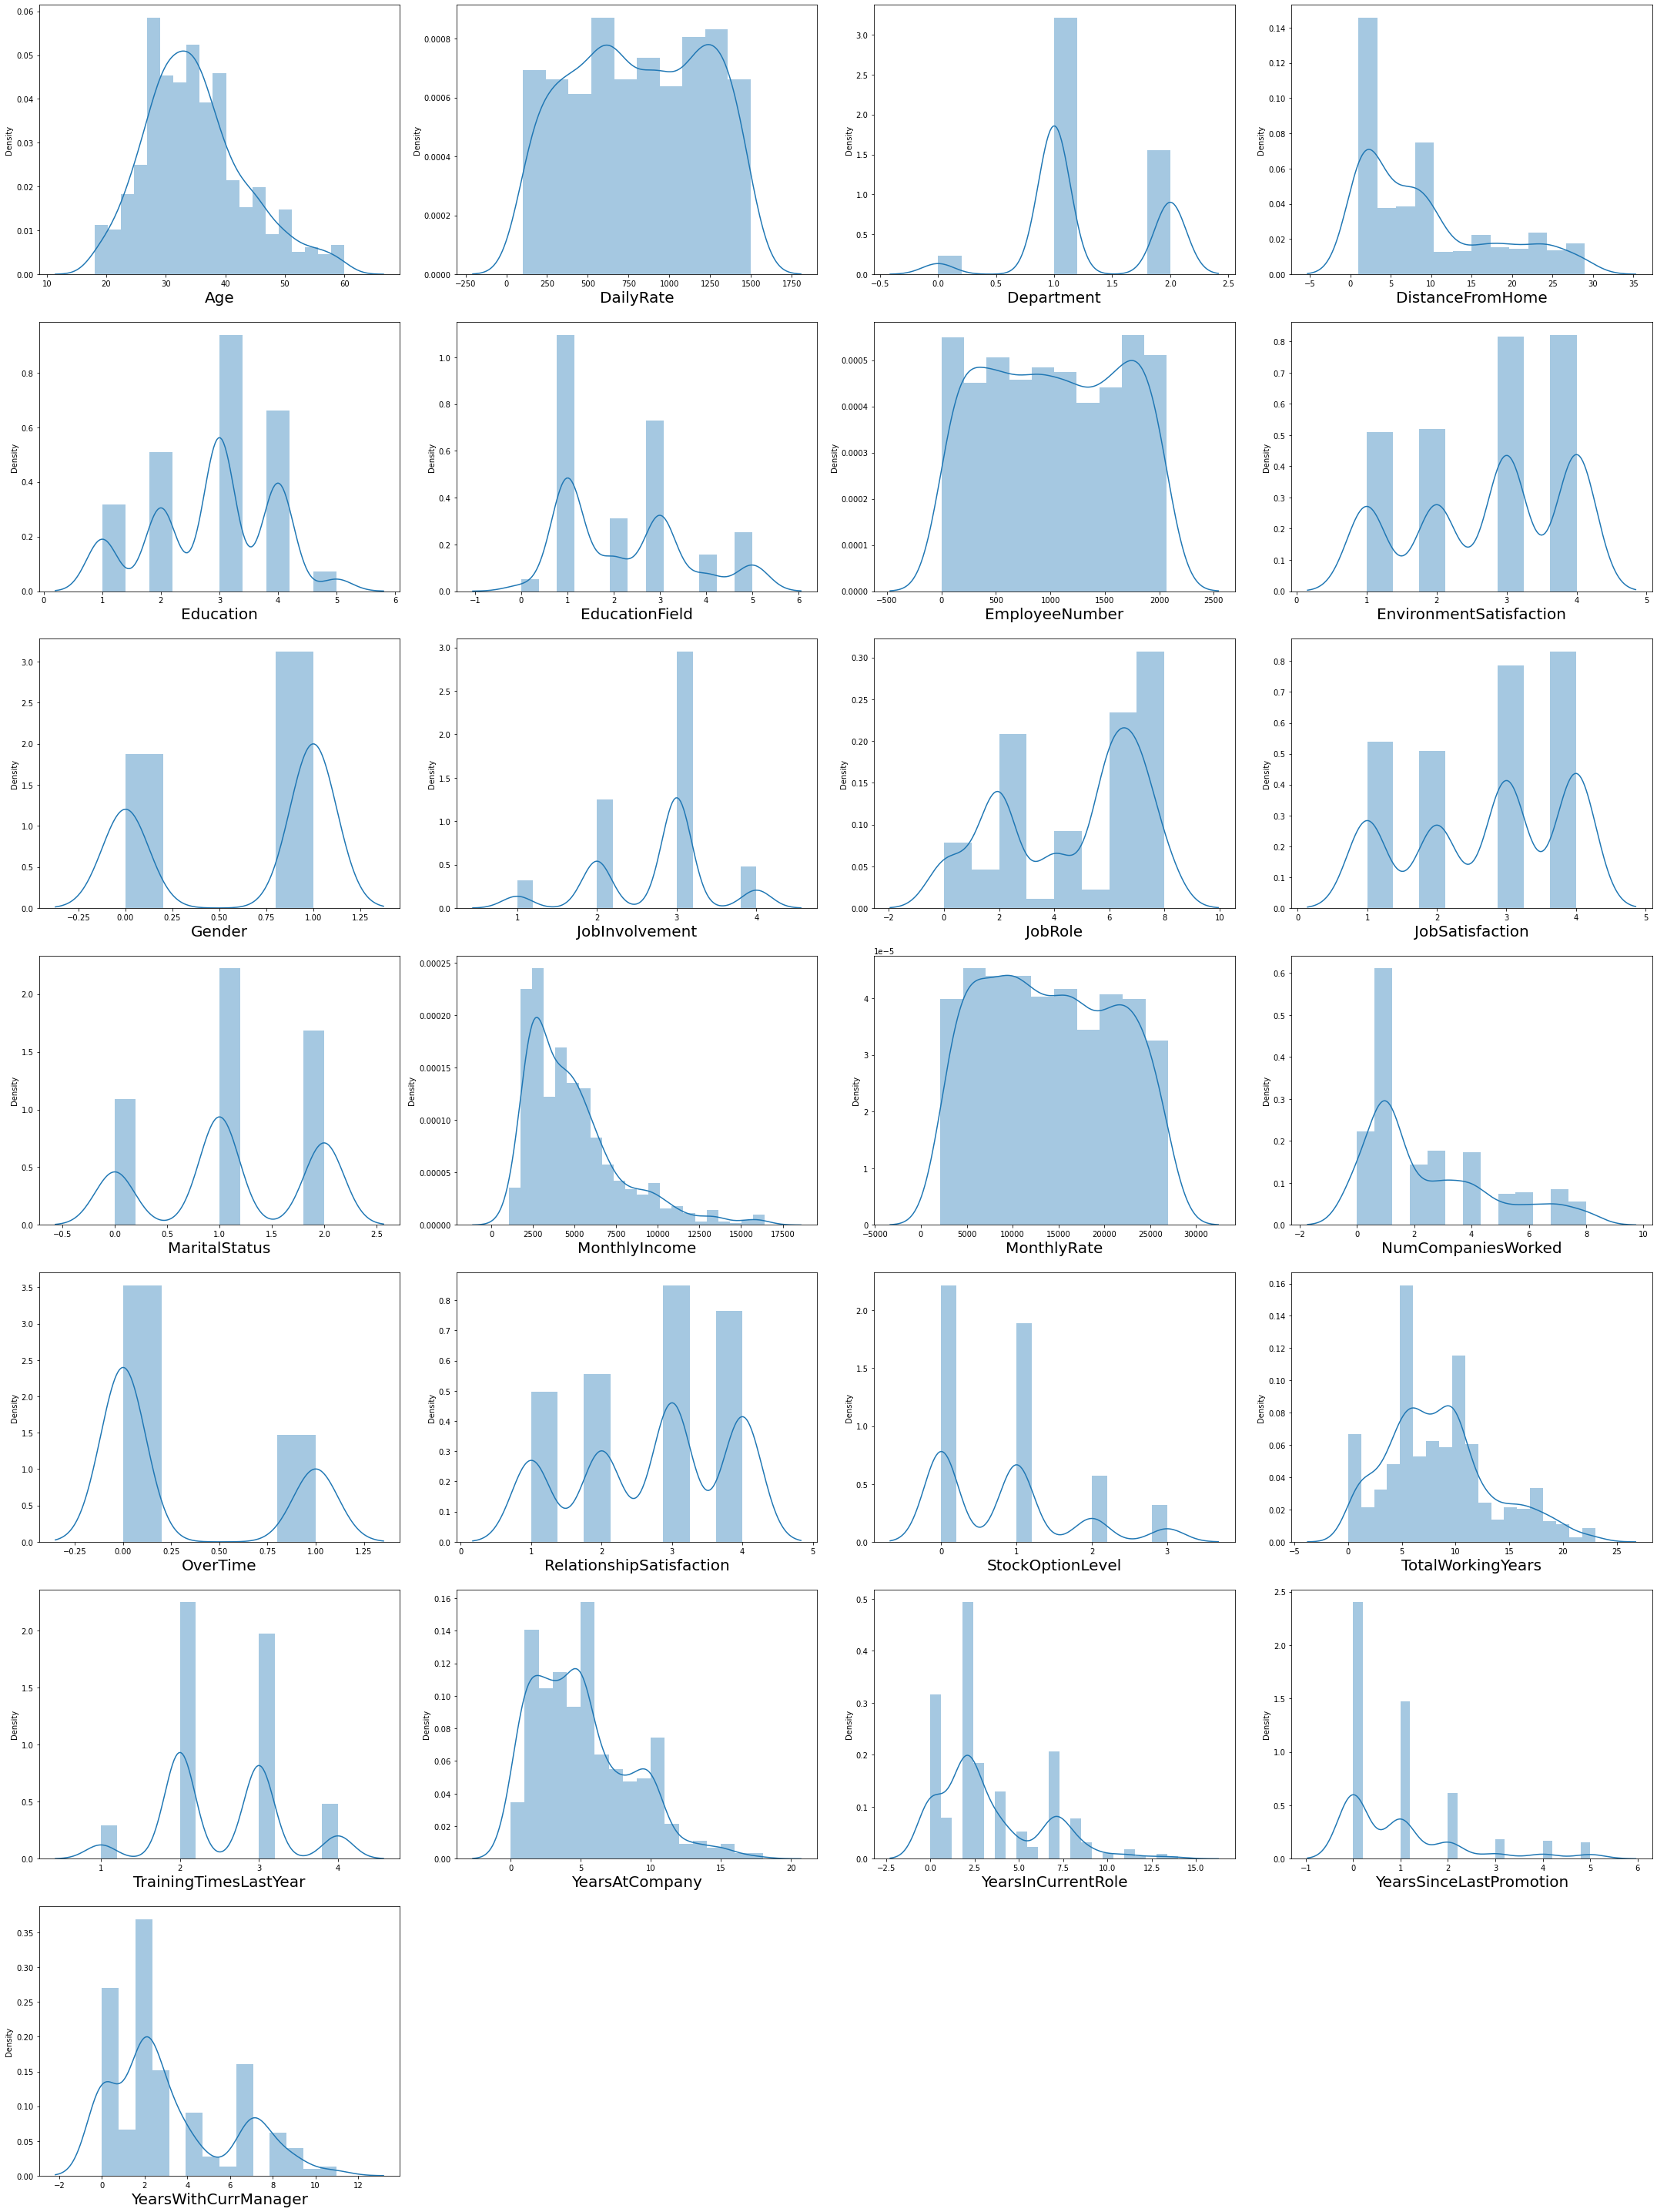

In [44]:
plt.figure(figsize=(30,40), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 28:
        ax = plt.subplot(7,4,plotno)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

There is a skewness present in the data hence using PowerTransformer to remove it

In [45]:
scaler = PowerTransformer(method='yeo-johnson')

In [46]:
df[['Age','YearsSinceLastPromotion','YearsInCurrentRole','YearsAtCompany','TotalWorkingYears', 'StockOptionLevel','MonthlyIncome']] = scaler.fit_transform(df[['Age','YearsSinceLastPromotion','YearsInCurrentRole','YearsAtCompany','TotalWorkingYears', 'StockOptionLevel','MonthlyIncome']].values)

In [47]:
x = df.drop(['Attrition'],axis=1)
y = df['Attrition']

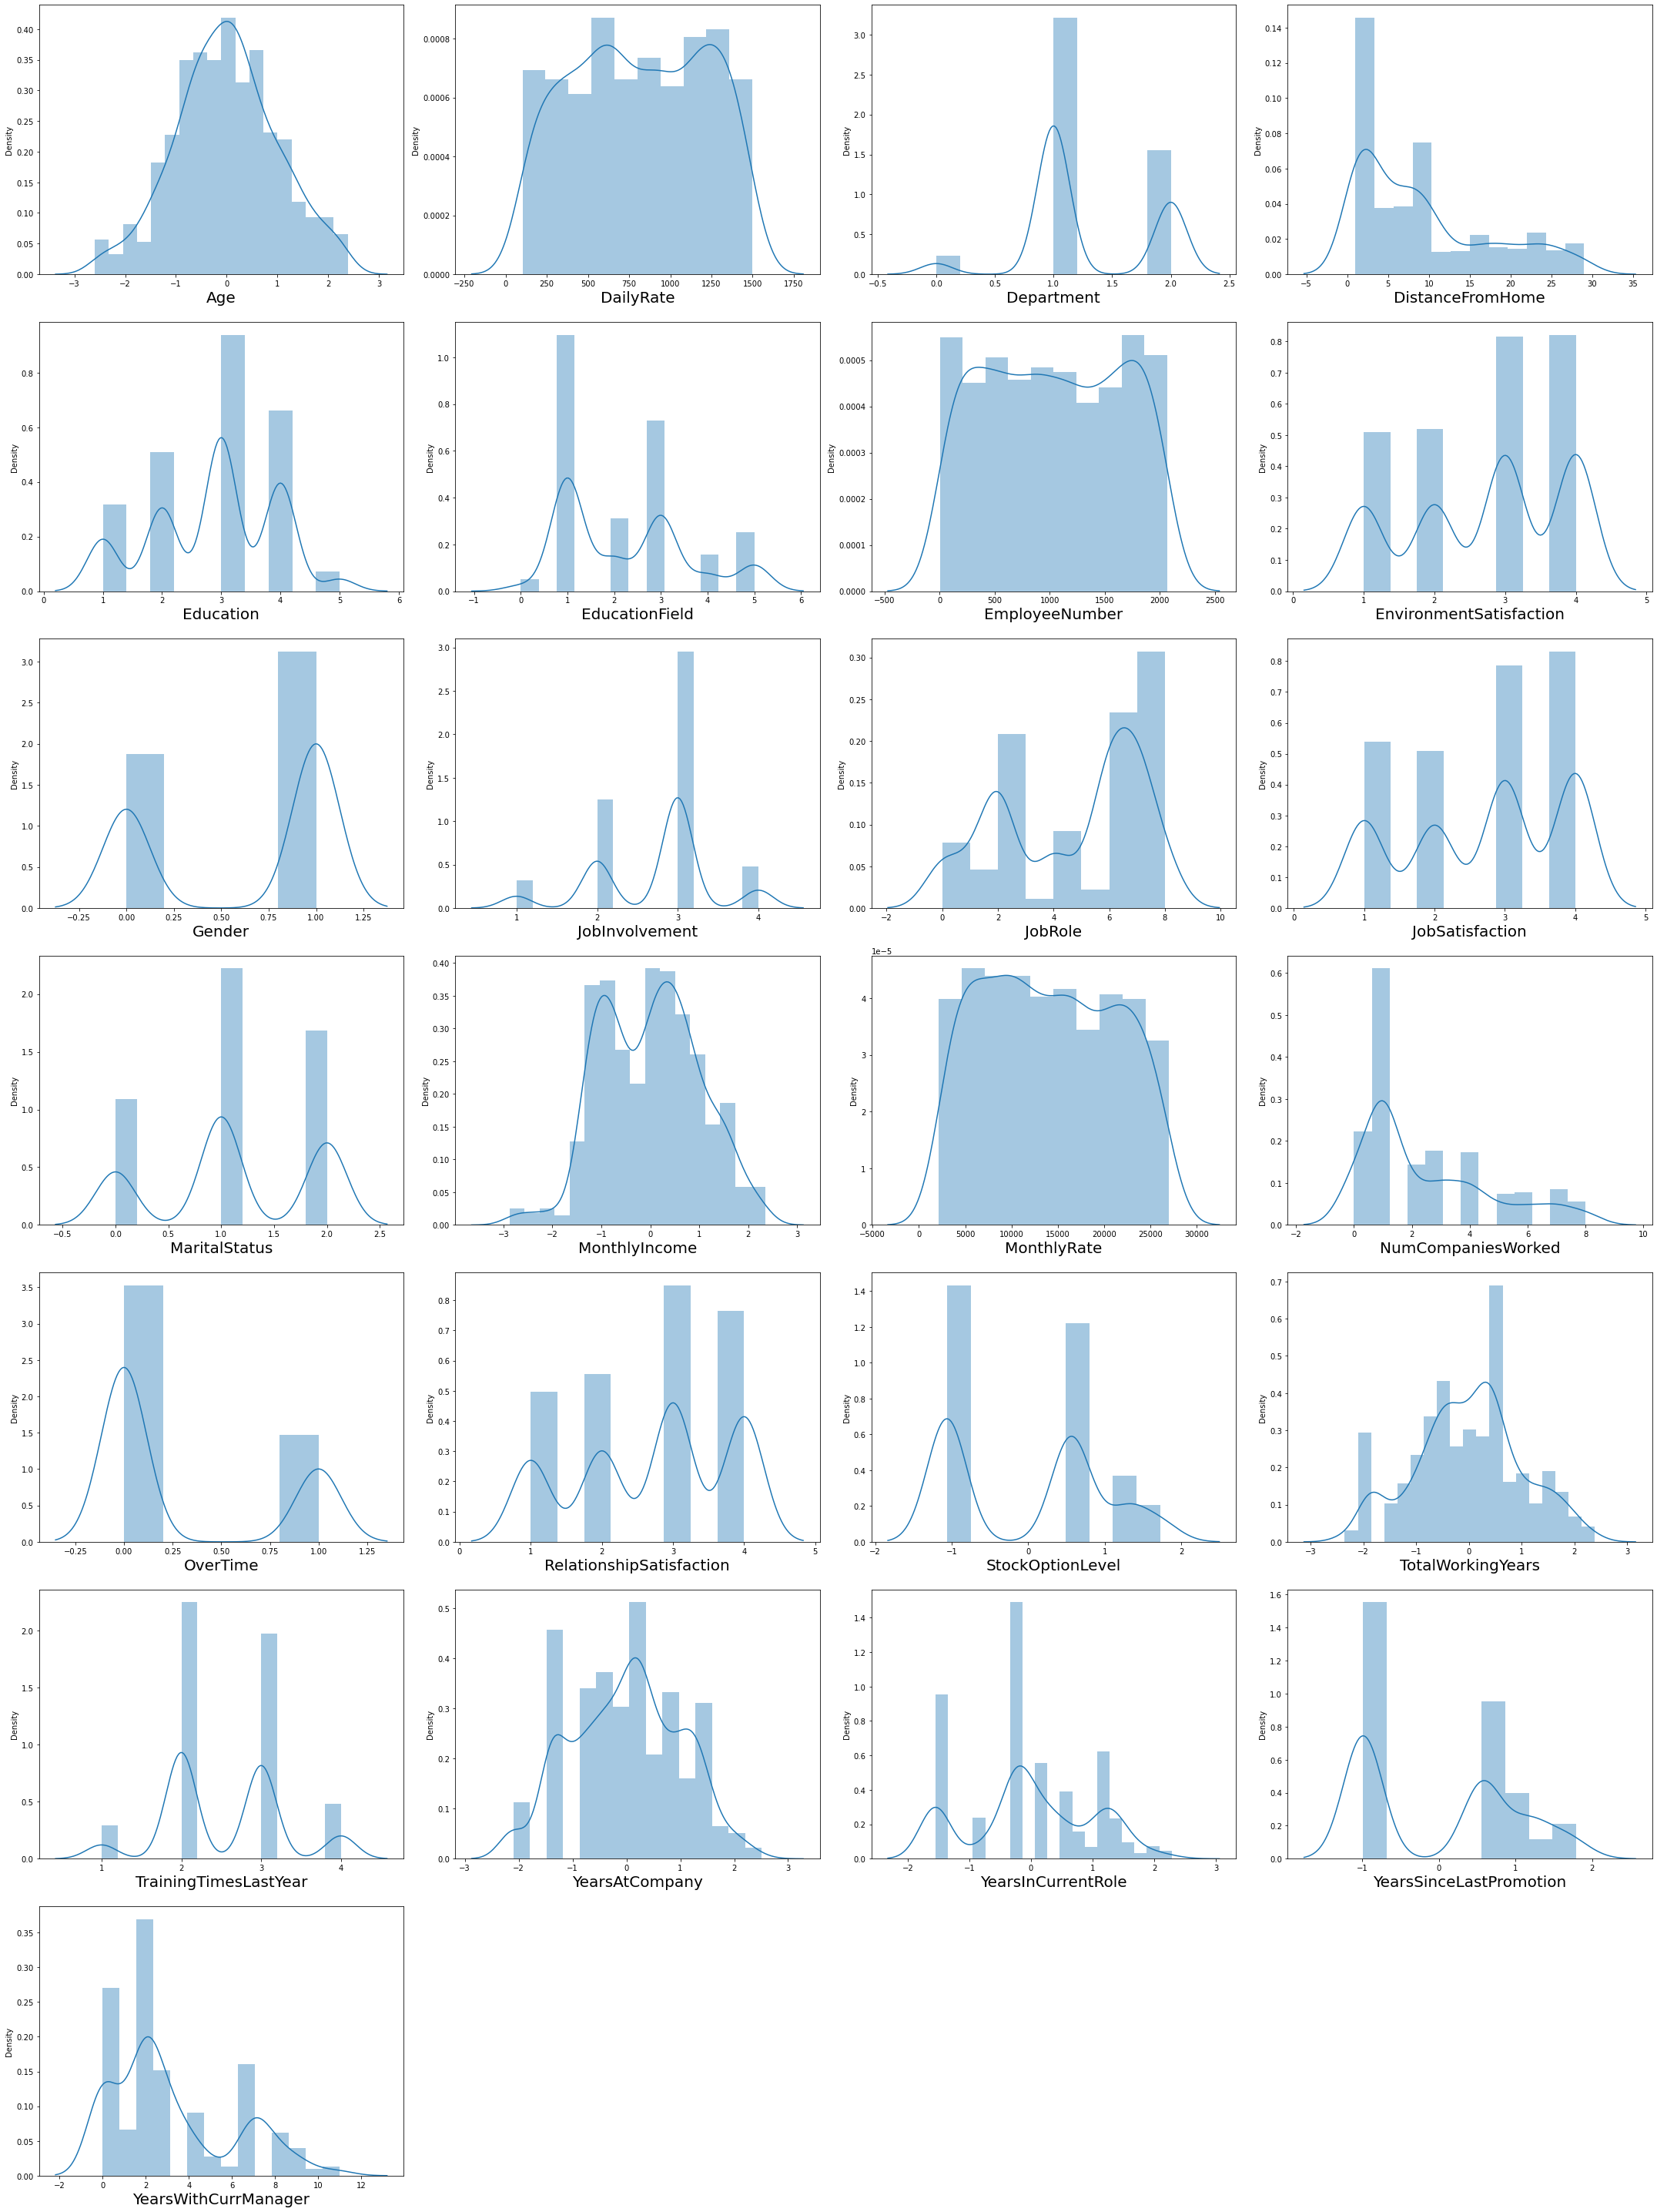

In [48]:
plt.figure(figsize=(30,40), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 28:
        ax = plt.subplot(7,4,plotno)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

Removed skewness from the data

In [49]:
x = df.drop(['Attrition'],axis=1)
y = df['Attrition']

In [50]:
df['Attrition'].value_counts()

0.0    733
1.0    156
Name: Attrition, dtype: int64

There is a imbalance between Label hence have applied OverSampling method to balance the dataset

In [51]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(x)

Scaling the data

In [52]:
x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.01,random_state = 65)

Have added test_size small so that we can not loose train data 

In [53]:
ove_smp=SMOTE(0.75)

x_train_new, y_train_new = ove_smp.fit_sample(x_train, y_train)

In [54]:
print (y_train.value_counts())
print (y_train_new.value_counts())

0.0    725
1.0    155
Name: Attrition, dtype: int64
0.0    725
1.0    543
Name: Attrition, dtype: int64


Now the data is balanced

In [55]:
X_scale = x_train_new
y = y_train_new

# Model Buidling

# LogisticRegression

In [56]:
maxAccu =0 
maxRS= 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = i)
    log = LogisticRegression()
    log.fit(x_train,y_train)
    y_pred=log.predict(x_test)
    acc=accuracy_score(y_test, y_pred)
    print('accuracy', acc,'Random_state',i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print('max_accuracy', maxAccu,'max_Random_state',i)

accuracy 0.8170347003154574 Random_state 1
max_accuracy 0.8170347003154574 max_Random_state 1
accuracy 0.8264984227129337 Random_state 2
max_accuracy 0.8264984227129337 max_Random_state 2
accuracy 0.807570977917981 Random_state 3
accuracy 0.804416403785489 Random_state 4
accuracy 0.7981072555205048 Random_state 5
accuracy 0.7697160883280757 Random_state 6
accuracy 0.804416403785489 Random_state 7
accuracy 0.7917981072555205 Random_state 8
accuracy 0.8012618296529969 Random_state 9
accuracy 0.8012618296529969 Random_state 10
accuracy 0.807570977917981 Random_state 11
accuracy 0.8264984227129337 Random_state 12
accuracy 0.8012618296529969 Random_state 13
accuracy 0.7823343848580442 Random_state 14
accuracy 0.8012618296529969 Random_state 15
accuracy 0.7949526813880127 Random_state 16
accuracy 0.7981072555205048 Random_state 17
accuracy 0.7854889589905363 Random_state 18
accuracy 0.8201892744479495 Random_state 19
accuracy 0.807570977917981 Random_state 20
accuracy 0.750788643533123 Rando

accuracy 0.7791798107255521 Random_state 183
accuracy 0.7791798107255521 Random_state 184
accuracy 0.7760252365930599 Random_state 185
accuracy 0.7949526813880127 Random_state 186
accuracy 0.750788643533123 Random_state 187
accuracy 0.8012618296529969 Random_state 188
accuracy 0.7665615141955836 Random_state 189
accuracy 0.7917981072555205 Random_state 190
accuracy 0.7760252365930599 Random_state 191
accuracy 0.8107255520504731 Random_state 192
accuracy 0.7760252365930599 Random_state 193
accuracy 0.8012618296529969 Random_state 194
accuracy 0.8201892744479495 Random_state 195
accuracy 0.8107255520504731 Random_state 196
accuracy 0.8012618296529969 Random_state 197
accuracy 0.7823343848580442 Random_state 198
accuracy 0.8264984227129337 Random_state 199


In [57]:
x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = 31)

In [58]:
def print_score(clf, x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        
        print('\n===============Train Result===============')
        print(f'Accuracy Score: {accuracy_score(y_train, y_pred)*100:.2f}%')
        
        
    elif train==False:
        pred = clf.predict(x_test)
        
        print('\n===============Test Result===============')
        print(f'Accuracy Score: {accuracy_score(y_test, pred)*100:.2f}%')
        
        print('\n \n Test Classification Report \n', classification_report(y_test, pred, digits=2))
        
        scr_log = cross_val_score(clf,X_scale,y,cv=5)
        print('Cross Validation Score- ', scr_log.mean())

In [59]:
log = LogisticRegression()
log.fit(x_train,y_train)

print_score(log,x_train,x_test,y_train,y_test, train=True)
print_score(log,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 79.28%

===============Test Result===============
Accuracy Score: 83.60%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.85      0.88      0.87       189
         1.0       0.82      0.77      0.79       128

    accuracy                           0.84       317
   macro avg       0.83      0.82      0.83       317
weighted avg       0.84      0.84      0.84       317

Cross Validation Score-  0.7957486539479007


# RandomForestClassifier

In [60]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

print_score(rfc,x_train,x_test,y_train,y_test, train=True)
print_score(rfc,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 100.00%

===============Test Result===============
Accuracy Score: 93.69%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.91      0.99      0.95       189
         1.0       0.98      0.86      0.92       128

    accuracy                           0.94       317
   macro avg       0.95      0.92      0.93       317
weighted avg       0.94      0.94      0.94       317

Cross Validation Score-  0.9125424045314494


# DecisionTreeClassifier

In [61]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

print_score(dtc,x_train,x_test,y_train,y_test, train=True)
print_score(dtc,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 100.00%

===============Test Result===============
Accuracy Score: 81.70%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.86      0.83      0.84       189
         1.0       0.76      0.80      0.78       128

    accuracy                           0.82       317
   macro avg       0.81      0.82      0.81       317
weighted avg       0.82      0.82      0.82       317

Cross Validation Score-  0.8360368491487972


# GradientBoostingClassifier

In [64]:
gbdt = GradientBoostingClassifier()
gbdt.fit(x_train,y_train)

print_score(gbdt,x_train,x_test,y_train,y_test, train=True)
print_score(gbdt,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 97.79%

===============Test Result===============
Accuracy Score: 91.48%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.90      0.97      0.93       189
         1.0       0.95      0.84      0.89       128

    accuracy                           0.91       317
   macro avg       0.92      0.90      0.91       317
weighted avg       0.92      0.91      0.91       317

Cross Validation Score-  0.888126731194174


# Support Vector Classifier

In [65]:
svc = SVC()
svc.fit(x_train,y_train)

print_score(svc,x_train,x_test,y_train,y_test, train=True)
print_score(svc,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 96.00%

===============Test Result===============
Accuracy Score: 90.85%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.92      0.93      0.92       189
         1.0       0.90      0.88      0.89       128

    accuracy                           0.91       317
   macro avg       0.91      0.90      0.90       317
weighted avg       0.91      0.91      0.91       317

Cross Validation Score-  0.8935638479972612


# KNeighborsClassifier

In [66]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

print_score(knn,x_train,x_test,y_train,y_test, train=True)
print_score(knn,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 81.60%

===============Test Result===============
Accuracy Score: 77.29%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.96      0.65      0.77       189
         1.0       0.65      0.96      0.77       128

    accuracy                           0.77       317
   macro avg       0.80      0.80      0.77       317
weighted avg       0.83      0.77      0.77       317

Cross Validation Score-  0.7697799632753416


# Findings

- LogisticsRegression - Cross Validation Score is 80.59%, Accuracy Score of Train Result is 79.50% and Test Result is 86.12%
- RandomForestClassifier - Cross Validation Score is 91.96%, Accuracy Score of Train Result is 100% and Test Result is 90.85%
- DecisionTreeClassifier - Cross Validation Score is 82.81%, Accuracy Score of Train Result is 100% and Test Result is 79.18%
- GradientBoostingClassifier - Cross Validation Score is 89.20%, Accuracy Score of Train Result is 98% and Test Result is 91.80%
- Support Vector Classifier - Cross Validation Score is 90.22%, Accuracy Score of Train Result is 96.53% and Test Result is 91.48%
- KNeighborsClassifier - Cross Validation Score is 78.79%, Accuracy Score of Train Result is 84.02% and Test Result is 78.86%

# Hyper tuning

In [67]:
grid_param = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': range(1,15),
    'random_state': range(1,15),
    'gamma': ['scale', 'auto'],
    'decision_function_shape': ['ovo', 'ovr']
}

In [68]:
grid_search = GridSearchCV(estimator=svc,
                          param_grid=grid_param,
                          cv=5,
                          n_jobs =-1)

In [69]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': range(1, 15),
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf'],
                         'random_state': range(1, 15)})

In [71]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'C': 9, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf', 'random_state': 1}


In [72]:
svc = SVC(C= 7, kernel='rbf', random_state=1, decision_function_shape='ovo', gamma='scale')
svc.fit(x_train,y_train)

SVC(C=7, decision_function_shape='ovo', random_state=1)

In [73]:
y_pred = svc.predict(x_test)
pred = svc.predict(x_train)

In [74]:
print(f'Train Accuracy Score: {accuracy_score(y_train, pred)*100:.2f}%')
print(f'Test Accuracy Score: {accuracy_score(y_test, y_pred)*100:.2f}%')
print(classification_report(y_test, y_pred))

Train Accuracy Score: 100.00%
Test Accuracy Score: 92.11%
              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93       189
         1.0       0.87      0.95      0.91       128

    accuracy                           0.92       317
   macro avg       0.92      0.93      0.92       317
weighted avg       0.92      0.92      0.92       317



- Previous Accuracy Score for Support Vector Classifier - 91.48%
- New Accuracy Score for Support Vector Classifier - 92.43%

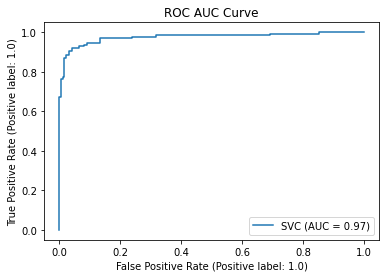

In [75]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(svc,x_test,y_test)
plt.title("ROC AUC Curve")
plt.show()

#### Accuracy score of Support Vector Classifier after Tuning the model is 92.43% and AUC score is 98% which is pretty good

# Saving the Model

In [76]:
file = 'HR_Analytics_Project.pickle'
pickle.dump(svc, open(file, 'wb'))